In [1]:
import dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import cv2

In [22]:
data = dataset.LoadFDDB(
    'D:\\Github\\pppFaceDetection\\dataset\\300w\\300w_train.txt',
    'D:\\Github\\pppFaceDetection\\dataset\\300w\\images')

In [28]:
x = []
y = []
angle = []

for d in data:
    img = cv2.imread(d[0])
    max_dim = max(img.shape[0], img.shape[1])
    
    for el in d[1]:
        x.append(el[2] / max_dim)
        y.append(el[3] / max_dim)
        angle.append(180.0 / 3.14 * el[4])

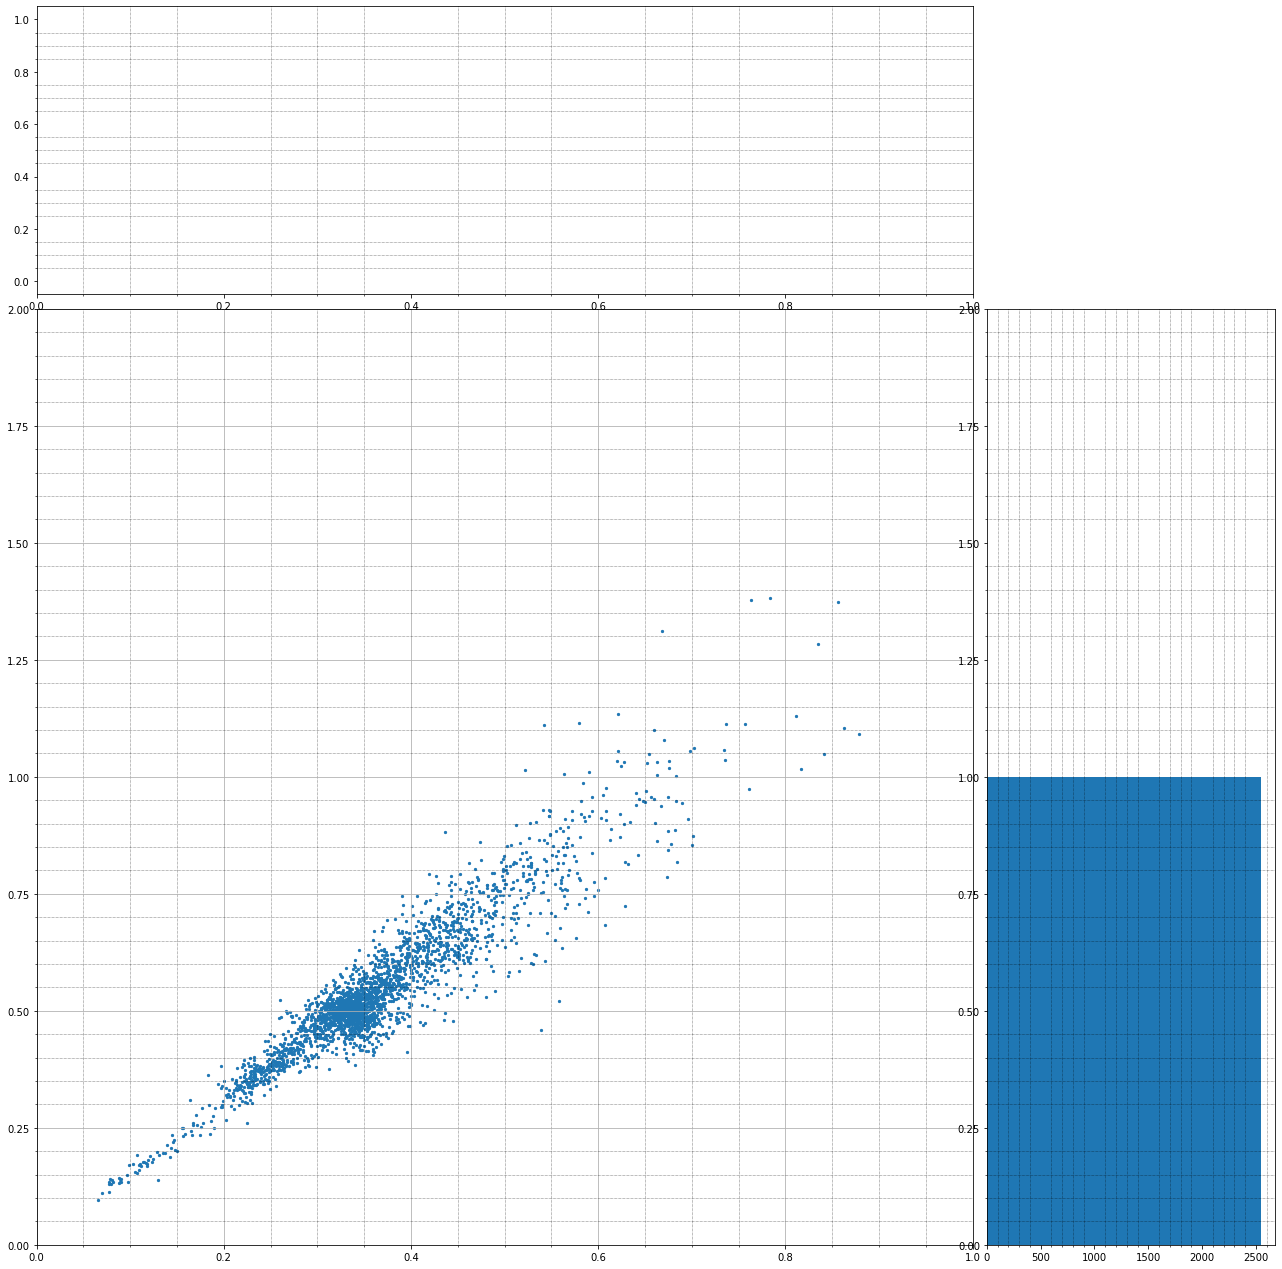

In [33]:
plt.figure(figsize=(20, 20))

left, bottom, width, height, spacing = 0.1, 0.1, 0.65, 0.65, 0.01

ax_scatter = plt.axes([left, bottom, width, height])
ax_histx = plt.axes([left, bottom + height + spacing, width, 0.2])
ax_histy = plt.axes([left + width + spacing, bottom, 0.2, height])

# scatter
ax_scatter.scatter(x, y, s=5)
ax_scatter.grid(True)
ax_scatter.minorticks_on()
ax_scatter.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax_scatter.yaxis.label.set_size(1000)

# now determine nice limits by hand:
binwidth = 0.1
x_max = np.ceil(np.max(x))
x_min = np.floor(np.min(x))
y_max = np.ceil(np.max(y))
y_min = np.floor(np.min(y))

ax_scatter.set_xlim((x_min, x_max))
ax_scatter.set_ylim((y_min, y_max))

x_bins = np.arange(x_min, x_max, 1)
y_bins = np.arange(y_min, y_max, 1)
ax_histx.hist(x, bins=x_bins)
ax_histy.hist(y, bins=y_bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_histx.minorticks_on()
ax_histy.minorticks_on()

ax_histx.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax_histy.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.savefig("d:/figplot.png")
plt.show()

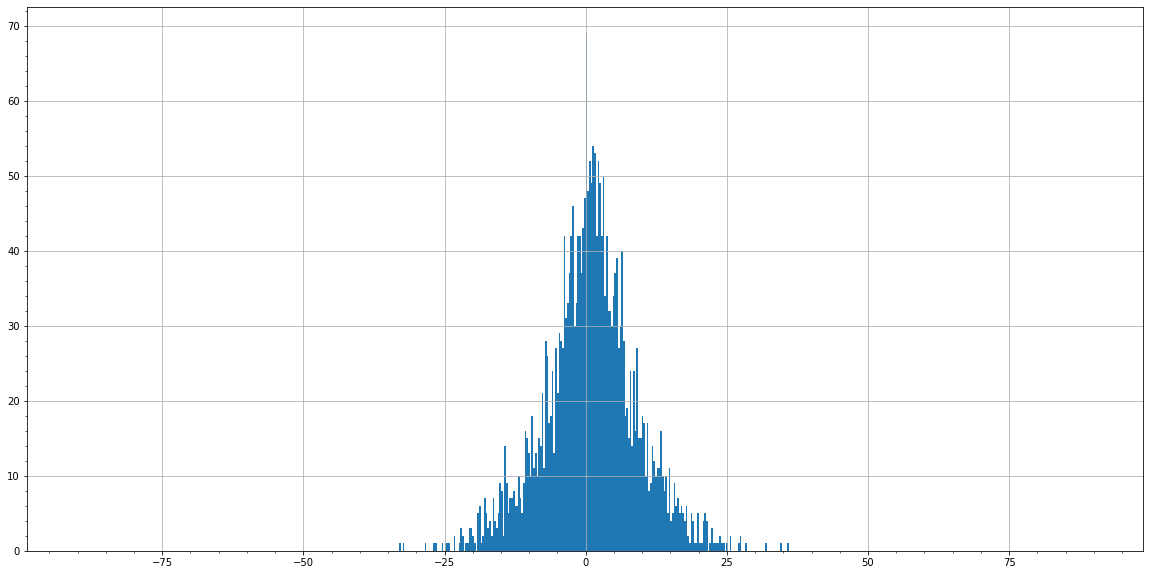

In [11]:
plt.figure(figsize=(20, 10))

angle_min = np.min(angle_norm)
angle_max = np.max(angle_norm)
angle_bin = np.arange(angle_min, -angle_min, 0.3)

plt.hist(angle, bins=angle_bin)
plt.grid(True)
plt.minorticks_on()

plt.savefig("d:/figplot.png")
plt.show()